In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

# Use the citipy module to determine city based on latitude
from citipy import citipy

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61271cf1bc5b538024928e798980e699


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=61271cf1bc5b538024928e798980e699&q=Boston


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | dikson
Processing Record 2 of Set 13 | faanui
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | arraial do cabo
Processing Record 5 of Set 13 | la rioja
Processing Record 6 of Set 13 | saskylakh
Processing Record 7 of Set 13 | port lincoln
Processing Record 8 of Set 13 | barrow
Processing Record 9 of Set 13 | pangnirtung
Processing Record 10 of Set 13 | ilulissat
Processing Record 11 of Set 13 | khatanga
Processing Record 12 of Set 13 | chokurdakh
Processing Record 13 of Set 13 | tubruq
City not found. Skipping...
Processing Record 14 of Set 13 | tiznit
Processing Record 15 of Set 13 | iguape
Processing Record 16 of Set 13 | san quintin
Processing Record 17 of Set 13 | ust-ordynskiy
Processing Record 18 of Set 13 | hofn
Processing Record 19 of Set 13 | sibu
Processing Record 20 of Set 13 | los llanos de aridane
Processing Record 21 of Set 13 | provideniya
Processing Record 22

Processing Record 27 of Set 16 | saint-philippe
Processing Record 28 of Set 16 | fare
Processing Record 29 of Set 16 | avila
Processing Record 30 of Set 16 | margate
Processing Record 31 of Set 16 | matara
Processing Record 32 of Set 16 | novonikolayevskiy
Processing Record 33 of Set 16 | orikhiv
Processing Record 34 of Set 16 | pinas
Processing Record 35 of Set 16 | manavalakurichi
Processing Record 36 of Set 16 | saint george
Processing Record 37 of Set 16 | sitka
Processing Record 38 of Set 16 | nishihara
Processing Record 39 of Set 16 | port hedland
Processing Record 40 of Set 16 | nikolskoye
Processing Record 41 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 16 | portland
Processing Record 43 of Set 16 | itapuranga
Processing Record 44 of Set 16 | east london
Processing Record 45 of Set 16 | nemuro
Processing Record 46 of Set 16 | berlin
Processing Record 47 of Set 16 | balikpapan
Processing Record 48 of Set 16 | luangwa
Processing Record 49 of Set

Processing Record 15 of Set 20 | shahpur city
City not found. Skipping...
Processing Record 16 of Set 20 | lakatoro
Processing Record 17 of Set 20 | abha
Processing Record 18 of Set 20 | leningradskiy
Processing Record 19 of Set 20 | ambilobe
Processing Record 20 of Set 20 | amahai
Processing Record 21 of Set 20 | saint-joseph
Processing Record 22 of Set 20 | taltal
Processing Record 23 of Set 20 | kenai
Processing Record 24 of Set 20 | tanabe
Processing Record 25 of Set 20 | raudeberg
Processing Record 26 of Set 20 | rancho palos verdes
Processing Record 27 of Set 20 | acapulco
Processing Record 28 of Set 20 | verkhnyaya inta
Processing Record 29 of Set 20 | the pas
Processing Record 30 of Set 20 | mayumba
Processing Record 31 of Set 20 | ghorawal
Processing Record 32 of Set 20 | dingle
Processing Record 33 of Set 20 | tongren
Processing Record 34 of Set 20 | yuancheng
Processing Record 35 of Set 20 | duren
Processing Record 36 of Set 20 | tekeli
Processing Record 37 of Set 20 | grand

Processing Record 1 of Set 24 | arkadak
Processing Record 2 of Set 24 | cloquet
Processing Record 3 of Set 24 | ejea de los caballeros
Processing Record 4 of Set 24 | ribeira brava
Processing Record 5 of Set 24 | kang
Processing Record 6 of Set 24 | sambava
Processing Record 7 of Set 24 | vanavara
Processing Record 8 of Set 24 | roma
Processing Record 9 of Set 24 | ipixuna
Processing Record 10 of Set 24 | ibra
Processing Record 11 of Set 24 | zhigansk
Processing Record 12 of Set 24 | marawi
Processing Record 13 of Set 24 | geraldton
Processing Record 14 of Set 24 | shenjiamen
Processing Record 15 of Set 24 | batsfjord
Processing Record 16 of Set 24 | havoysund
Processing Record 17 of Set 24 | karaul
City not found. Skipping...
Processing Record 18 of Set 24 | dolbeau
City not found. Skipping...
Processing Record 19 of Set 24 | lafia
Processing Record 20 of Set 24 | larsnes
Processing Record 21 of Set 24 | yumen
Processing Record 22 of Set 24 | sistranda
Processing Record 23 of Set 24 |

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,34.30,93,100,14.36,RU,2021-07-15 19:42:56
1,Faanui,-16.4833,-151.7500,79.61,73,72,19.98,PF,2021-07-15 19:42:56
2,Vaini,-21.2000,-175.2000,71.76,94,75,10.36,TO,2021-07-15 19:42:56
3,Arraial Do Cabo,-22.9661,-42.0278,82.36,61,40,9.22,BR,2021-07-15 19:42:56
4,La Rioja,42.2500,-2.5000,62.38,79,6,3.33,ES,2021-07-15 19:42:57
5,Saskylakh,71.9167,114.0833,51.53,63,92,15.57,RU,2021-07-15 19:42:57
6,Port Lincoln,-34.7333,135.8667,53.64,83,28,29.95,AU,2021-07-15 19:42:57
7,Barrow,71.2906,-156.7887,44.62,70,40,14.97,US,2021-07-15 19:40:06
8,Pangnirtung,66.1451,-65.7125,50.00,87,20,12.66,CA,2021-07-15 19:42:57
9,Ilulissat,69.2167,-51.1000,46.42,71,20,6.91,GL,2021-07-15 19:42:58


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

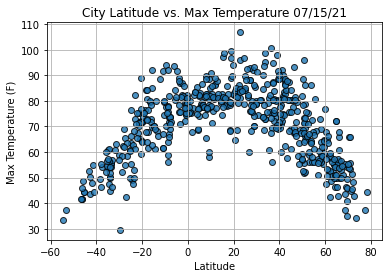

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

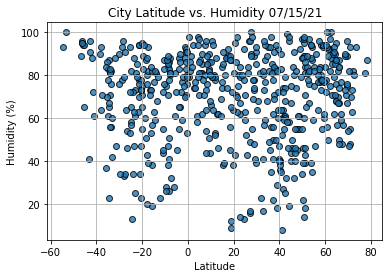

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

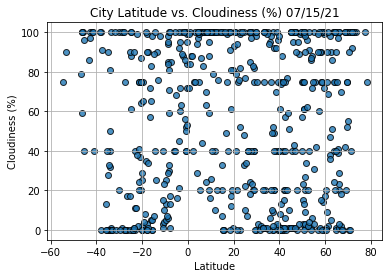

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

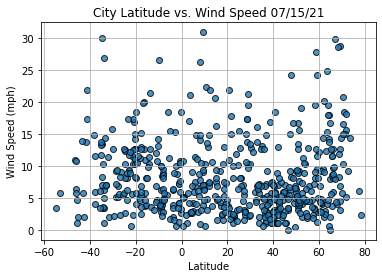

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()